# Exploratory Data Analysis (EDA) on Food Service Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Introduction:
The objective of this Project is to analyze a food service dataset to gain insights into operational efficiency and food waste management. The dataset consists of variables such as the number of meals served, kitchen staff, environmental conditions (temperature and humiditiy), and food waste. Our goal is to explore this data, clean it, visualize key patterns, and derive acionable insights to optimize operations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Food data.csv', encoding='ISO-8859-1')
df.head(2)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
0,0,12/19/2022,196.0,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy
1,1,11/21/2023,244.0,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt


---

# 1. Data Cleaning

## 1.1. Checking for missing values

In [ ]:
df.isnull().sum()

ID                    0
date                  0
meals_served         32
kitchen_staff        18
temperature_C         0
humidity_percent     16
day_of_week           0
special_event         0
past_waste_kg        16
staff_experience    337
waste_category       21
dtype: int64

---
**Note:**

- From above Observation, we can see that there are columns such as **meals_served**, **kitchen_staff**, **humidity_percent**, **paste_waste_kg**, **staff_experience**, and **waste_ctegory** has **null values**. But before tackeling the null values I have to further analyze the data so that an appropriate action should be taken regarding the null values.
- ---

## 1.2. Check for Duplicate Rows

In [ ]:
df.duplicated().sum()

0

## 1.3. Checking Data Types and Imputation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1822 non-null   int64  
 1   date              1822 non-null   object 
 2   meals_served      1790 non-null   float64
 3   kitchen_staff     1804 non-null   object 
 4   temperature_C     1822 non-null   float64
 5   humidity_percent  1806 non-null   float64
 6   day_of_week       1822 non-null   int64  
 7   special_event     1822 non-null   object 
 8   past_waste_kg     1806 non-null   float64
 9   staff_experience  1485 non-null   object 
 10  waste_category    1801 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 156.7+ KB


- It seems that the data type of certain columns are not appropriate such as **date**, **kitchen_staff** and **special_event**. sot lets further investigate and change the data type accordingly.

In [ ]:
# Date
# Since the there is no null values here, therefore no further investigation is needed. We only change the date type.
df['date'] = pd.to_datetime(df['date'])

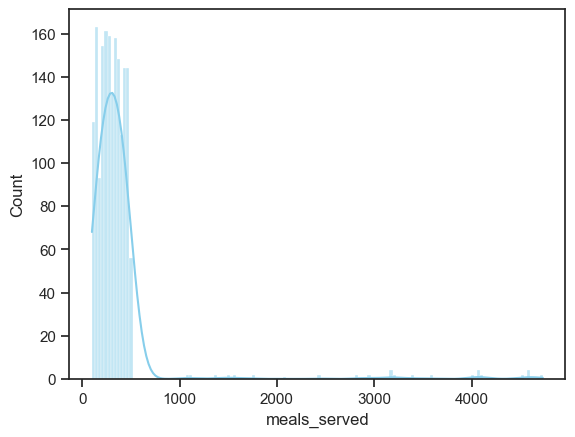

In [ ]:
# meals_served
# The datatype of meals_served column is ok. But inorder to impute the null values we need to see its histogram.

sns.histplot(df['meals_served'],color = 'skyblue', kde=True)
plt.show()

In [ ]:
# Since, the meals_served column is right skewed and number of null values is very less i.e. 32/1822 so the best option for imputation is the median.
df['meals_served'] = df['meals_served'].fillna(df['meals_served'].median())

In [ ]:
# kitchen_staff
df['kitchen_staff'].value_counts()

kitchen_staff
12        143
5         138
10        130
9         127
13        127
15        123
18        121
7         117
14        117
19        116
11        116
6         113
17        108
16        103
8          99
ten         4
eleven      2
Name: count, dtype: int64

In [ ]:
# Removing extra spaces before and after values
df['kitchen_staff'] = df['kitchen_staff'].str.strip()

In [ ]:
# the ten and eleven datas are inconsistant that needs to be converted to match the others.

df['kitchen_staff'] = df['kitchen_staff'].replace('ten', '10')
df['kitchen_staff'] = df['kitchen_staff'].replace('eleven', '11')

In [ ]:
# Since the kitchen_staff column has null values as well as its data type is not approperiate i.e. object.
# 1st we have to impute the null values with mode as the data type is object also the number of null values is very small 18/1822.
# 2nd we can safely change its data type from object to int64

df['kitchen_staff'] = df['kitchen_staff'].fillna(df['kitchen_staff'].mode()[0])
df['kitchen_staff'] = df['kitchen_staff'].astype('int64')

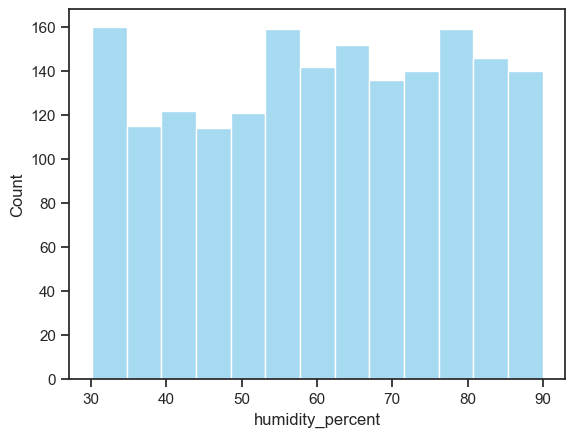

In [ ]:
# humidity_percent
# The data type is ok. But inorder to impute its null values appropriately, we need to check its histogram.

sns.histplot(df['humidity_percent'], color = 'skyblue')
plt.show()

In [ ]:
# since the number of null values is very small and the distribution is roughly uniform we can choose either mean or median for imputing null values

df['humidity_percent'] = df['humidity_percent'].fillna(df['humidity_percent'].mean())

In [ ]:
# special_event
df['special_event'].value_counts()

special_event
0       1666
1        148
One        8
Name: count, dtype: int64

In [ ]:
# first need to change the one to 1
df['special_event'] = df['special_event'].replace('one', 1)

In [ ]:
df['special_event'].value_counts()

special_event
0       1666
1        148
One        8
Name: count, dtype: int64

In [ ]:
# It seems that there are spaces before or after the word one so first we need to strip and then replace and convert to bool

df['special_event'] = df['special_event'].str.strip()
df['special_event'] = df['special_event'].replace('One', 1).astype('float64').astype('int64')
df['special_event'].value_counts()

special_event
0    1666
1     156
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1806 non-null   float64       
 9   staff_experience  1485 non-null   object        
 10  waste_category    1801 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


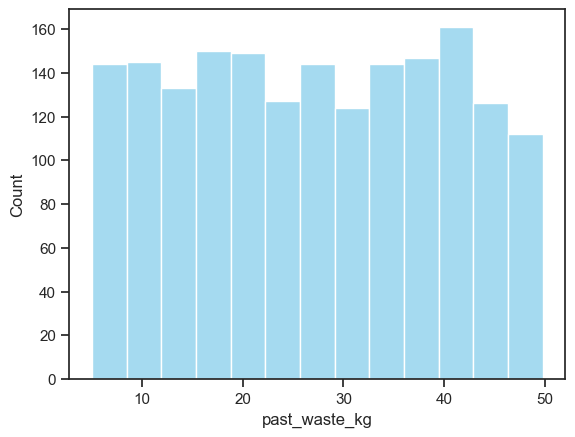

In [ ]:
# past_waste_kg
sns.histplot(x=df['past_waste_kg'], color = 'skyblue')
plt.show()

In [ ]:
# since the number of null values is very small and the distribution plot of the past_waste_kg is uniform so we can impute either with mean or median

df['past_waste_kg'] = df['past_waste_kg'].fillna(df['past_waste_kg'].mean())
df['past_waste_kg'].isnull().sum()

0

In [ ]:
df['staff_experience'].value_counts()

staff_experience
Beginner        381
Intermediate    368
intermediate    366
EXPERT          346
Pro              24
Name: count, dtype: int64

In [ ]:
# The data values are not consistent which should be made consistent
df['staff_experience'] = df['staff_experience'].str.capitalize()

In [ ]:
df['staff_experience'].isnull().sum()

337

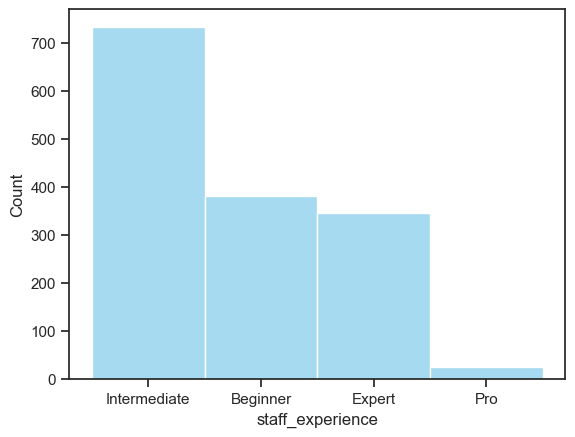

In [ ]:
# There are 337 null values so first lets check the distribution of the data
sns.histplot(df['staff_experience'], color = 'skyblue')
plt.show()

In [ ]:
# There is a significant amount of null values and the distribution is also skewed so better to use KNN Imputer
# to imput correctly and keep into consideration the other numerical columns as well

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# Step 1: Encode 'staff_experience' for KNNImputer (handle missing values)
le = LabelEncoder()
df['staff_experience_str'] = df['staff_experience'].astype(str)  # convert to string
df['staff_experience_encoded'] = le.fit_transform(df['staff_experience_str'])

# Step 2: Prepare the data for imputation
df_numeric = df[['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent',
                 'day_of_week', 'past_waste_kg', 'staff_experience_encoded']]

# Step 3: Replace encoded NaNs with actual NaNs (if any were originally NaN)
df_numeric.loc[df['staff_experience'].isnull(), 'staff_experience_encoded'] = np.nan

# Step 4: Apply KNN Imputation
imputer = KNNImputer(n_neighbors=10)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)


# Step 5: Round and decode the imputed 'staff_experience_encoded'
df_imputed['staff_experience_encoded'] = df_imputed['staff_experience_encoded'].round().astype(int)
df['staff_experience'] = le.inverse_transform(df_imputed['staff_experience_encoded'])

# Drop intermediate columns
df.drop(['staff_experience_encoded', 'staff_experience_str'], axis=1, inplace=True)

In [ ]:
df['staff_experience'].isnull().sum()

0

In [ ]:
# waste_category
df['waste_category'].value_counts()

waste_category
MEAT          419
dairy         351
Vegetables    350
MeAt          335
GRAINS        317
Barley         15
Wheat          14
Name: count, dtype: int64

In [ ]:
# Here in this column also we see inconsistant data which needs to be corrected

df['waste_category'] = df['waste_category'].str.capitalize()

In [ ]:
df['waste_category'].isnull().sum()

21

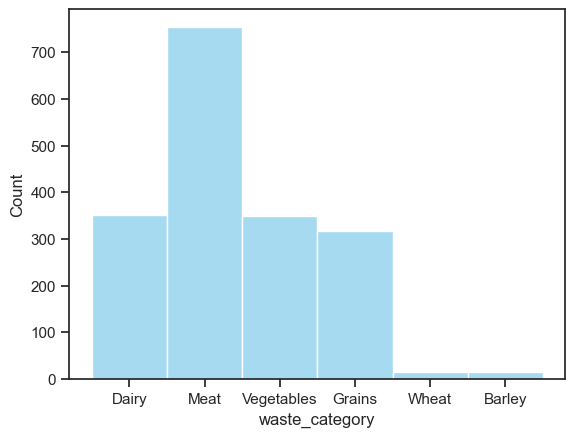

In [ ]:
# lets see the distribution

sns.histplot(df['waste_category'], color = 'skyblue')
plt.show()

In [ ]:
# Since the number of null values is very small also the data is right skewed so we use mode for imputation

df['waste_category'] = df['waste_category'].fillna(df['waste_category'].mode()[0])

In [ ]:
# lets check once again for any null values or inconsistent data if any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                1822 non-null   int64         
 1   date              1822 non-null   datetime64[ns]
 2   meals_served      1822 non-null   float64       
 3   kitchen_staff     1822 non-null   int64         
 4   temperature_C     1822 non-null   float64       
 5   humidity_percent  1822 non-null   float64       
 6   day_of_week       1822 non-null   int64         
 7   special_event     1822 non-null   int64         
 8   past_waste_kg     1822 non-null   float64       
 9   staff_experience  1822 non-null   object        
 10  waste_category    1822 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(2)
memory usage: 156.7+ KB


In [ ]:
columns = [ 'day_of_week', 'special_event', 'staff_experience', 'waste_category']

for col in columns:
    print(df[col].value_counts())
    print('')

day_of_week
6    266
5    266
2    264
0    262
3    256
1    254
4    254
Name: count, dtype: int64

special_event
0    1666
1     156
Name: count, dtype: int64

staff_experience
Intermediate    857
Expert          549
Beginner        392
Pro              24
Name: count, dtype: int64

waste_category
Meat          775
Dairy         351
Vegetables    350
Grains        317
Barley         15
Wheat          14
Name: count, dtype: int64



- **Here we have successfully completed the Data Cleaning Portion.**
- ---

# 2. Exploratory Data Analysis (EDA):

## 2.1. Summary Statistics

In [ ]:
df.describe()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg
count,1822.000000,1822,1822.000000,1822.000000,1822.000000,1822.000000,1822.00000,1822.000000,1822.000000
mean,910.500000,2023-04-22 09:30:37.541163520,372.327113,11.905598,22.189280,60.791257,3.01427,0.085620,26.997534
min,0.000000,2022-01-01 00:00:00,100.000000,5.000000,-10.372207,30.121111,0.00000,0.000000,5.008394
25%,455.250000,2022-07-25 06:00:00,212.250000,8.000000,15.684259,46.137537,1.00000,0.000000,16.148956
50%,910.500000,2023-04-23 00:00:00,306.000000,12.000000,22.115040,61.514385,3.00000,0.000000,26.997534
75%,1365.750000,2024-01-07 18:00:00,405.750000,15.000000,28.807494,75.755784,5.00000,0.000000,37.978663
max,1821.000000,2024-09-26 00:00:00,4730.000000,19.000000,60.000000,89.982828,6.00000,1.000000,49.803703
std,526.110413,NaN,490.505492,4.270492,8.919939,17.249947,2.00899,0.279879,12.735569


The meals_served column is right skewed and may there is some relation with special_event column. so let's investigate.

In [ ]:
df[(df['meals_served'] > 1000) & (df['special_event'] == 1)]

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category
129,129,2022-11-16,2930.0,19,17.929893,33.464463,2,1,20.743447,Intermediate,Meat
176,176,2023-09-15,3160.0,14,29.529261,38.219944,4,1,24.266983,Intermediate,Meat
1040,1040,2022-11-16,2930.0,19,17.929893,33.464463,2,1,20.743447,Intermediate,Meat
1087,1087,2023-09-15,3160.0,14,29.529261,38.219944,4,1,24.266983,Intermediate,Meat


It seems that there are duplicate rows in our data If we exclude ID. So We have remove those rows which seems to be a double entry problem.

In [ ]:
data_columns = [col for col in df.columns if col != "ID"]

df = df.drop_duplicates(subset=data_columns, keep='first')

In [ ]:
len(df)

1040

There were approximately 800 duplicated rows which were removed!!!

In [ ]:
df.describe(include='object')

,staff_experience,waste_category
count,1040,1040
unique,4,6
top,Intermediate,Meat
freq,476,426


## 2.2. Visualizing Distributions

Plotting the numerical columns.

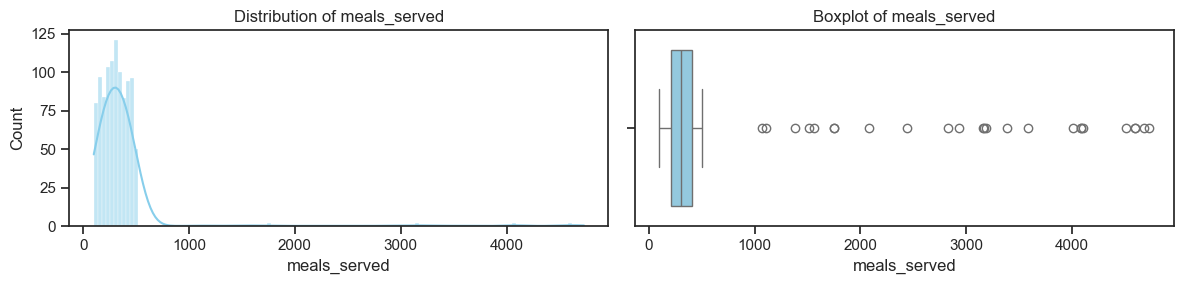

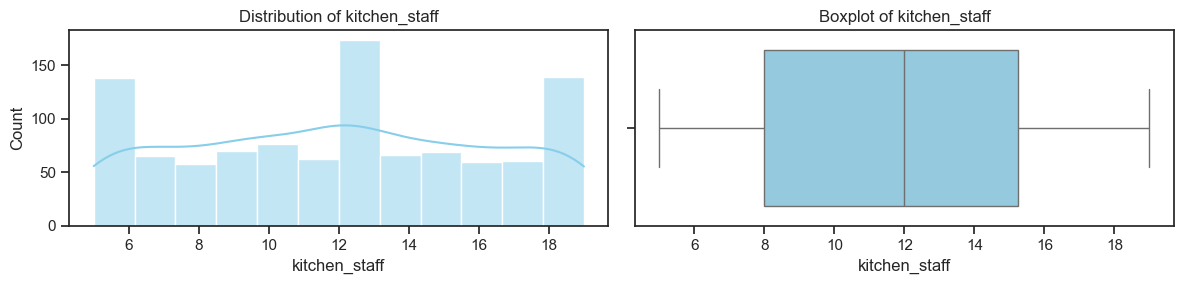

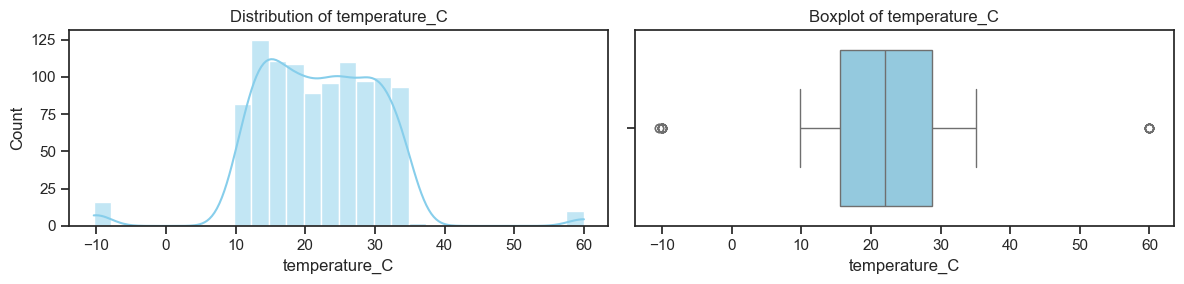

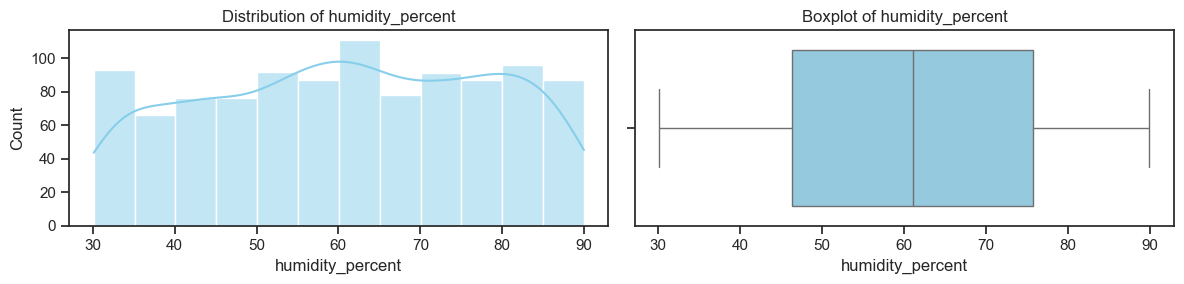

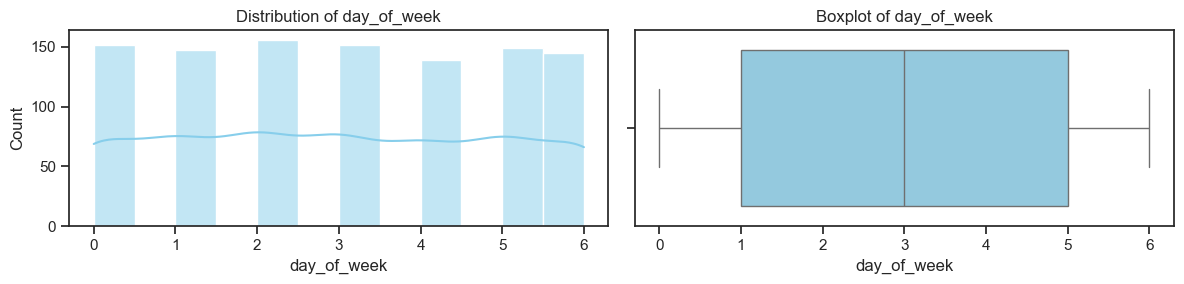

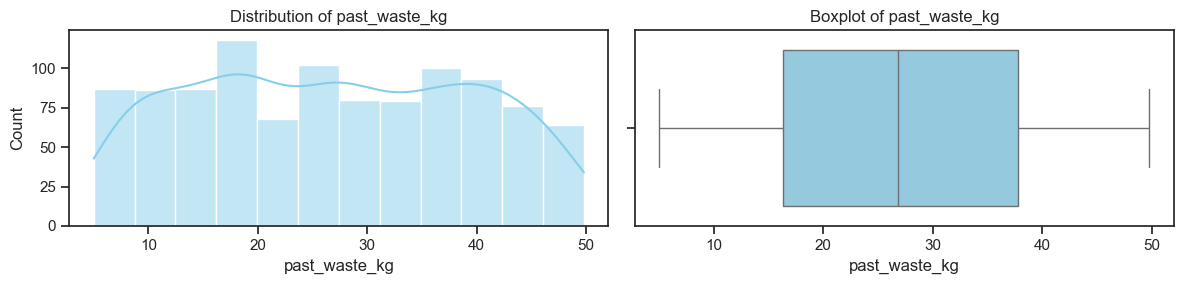

In [ ]:
numerical = ['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'day_of_week', 'past_waste_kg' ]

for col in numerical:
    fig, axes = plt.subplots(1, 2, figsize=(12, 3))  # 1 row, 2 columns

    # Histogram with KDE
    sns.histplot(df[col], kde=True, color = 'skyblue', ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')

    # Boxplot
    sns.boxplot(x=df[col], color='skyblue', ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

meals_served col is still right skewed and there are outliers above 1000.

Lets observe the Categorical Variables as well

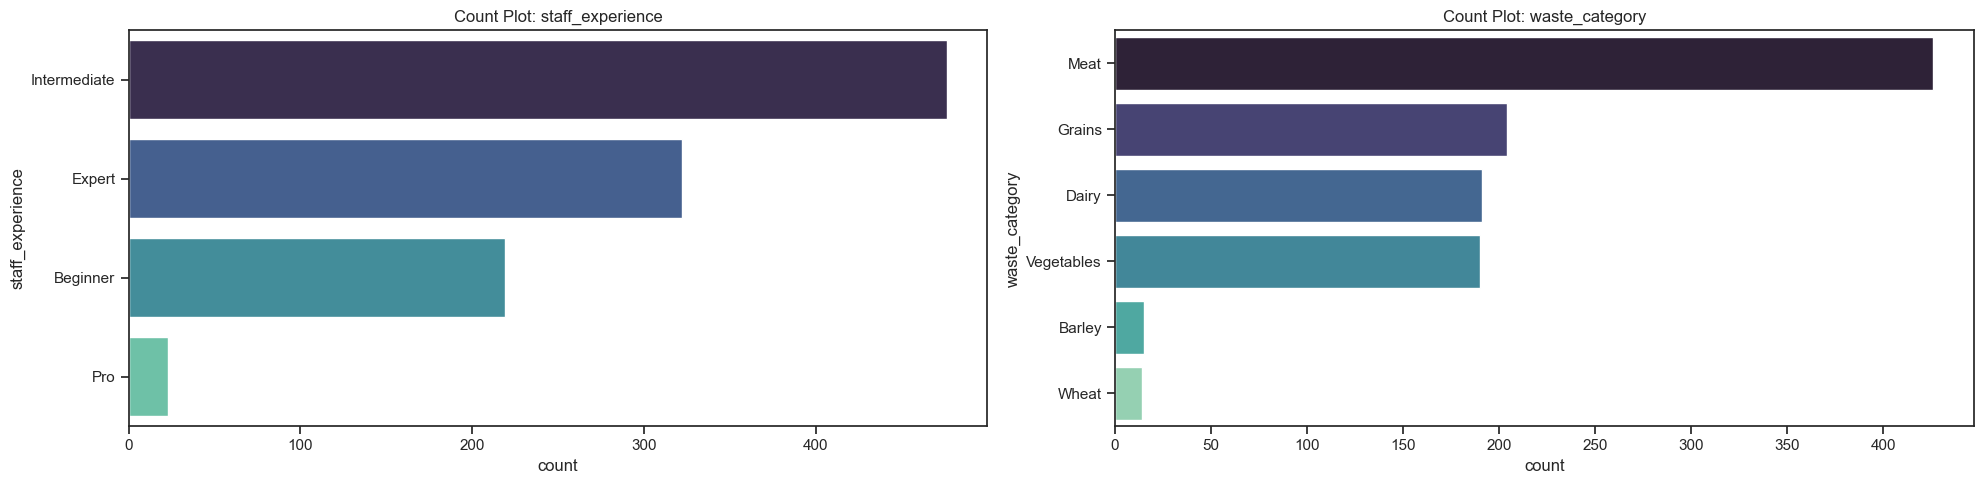

In [ ]:
categorical = ['staff_experience', 'waste_category']

fig, axes = plt.subplots(1, 2, figsize=(20, 5))  # 1 row, 5 columns

for i, col in enumerate(categorical):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette = 'mako', ax=axes[i])
    axes[i].set_title(f'Count Plot: {col}')

plt.tight_layout()
plt.show()

- Majority of orders were served by staff with intermediate experience level.
- Meat is the highest category of waste.

## 2.3. Correlation Analysis

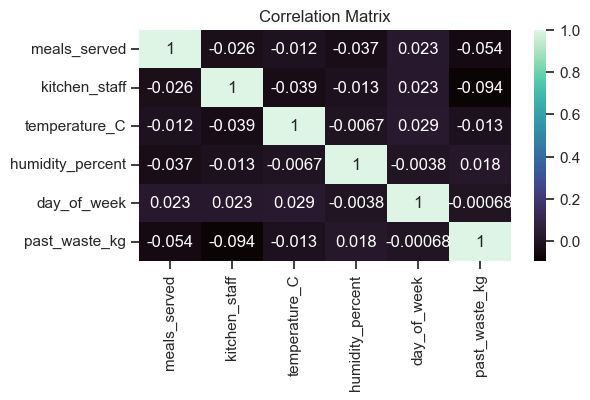

In [ ]:
corr = df[['meals_served', 'kitchen_staff', 'temperature_C', 'humidity_percent', 'day_of_week', 'past_waste_kg']].corr()
plt.figure(figsize=(6,3))
sns.heatmap(corr, annot=True, cmap='mako')
plt.title('Correlation Matrix')
plt.show()

- It seems that there is **no correlation** between abount of **food waste** and **meals served** in the given data set.
- Also there seems **no any influence** of **temperature** or **humidity** on **food waste** in the given data set.
- ---

# 3. Hypothesis Testing

## 3.1. Impact of Kitchen Staff on Food Waste

We will test whether the number of kitchen staff affects the amount of food waste. One hypothesis could be:

- **Null hypothesis (H0):** There is no relationship between the number of **kitchen staff** and **food waste.**
- **Alternative hypothesis (H1):** The number of kitchen staff significantly affects food waste.

We will use **Linear Regression** because both kitchen staff and food waste are of numerical values.

- Yes, the number of kitchen staff is statistically significantly associated with food waste — more staff slightly reduces waste.
- However, the practical effect is minimal and the model is a very poor predictor of food waste.

## 3.2. Special Events and Food Waste

We will test whether food waste increases during special events:

- **Null hypothesis (H0):** There is no difference in **food waste** between **special event** days and non-special event days.
- **Alternative hypothesis (H1):** Food waste is higher on special event days.

We will perform a **t-test** comparing the average food waste on days with and without special events.

In [ ]:
from scipy.stats import ttest_ind

# Split data into two groups
waste_event = df[df['special_event'] == 1]['past_waste_kg']
waste_non_event = df[df['special_event'] == 0]['past_waste_kg']

# Perform one-tailed t-test (greater alternative)
t_stat, p_value = ttest_ind(waste_event, waste_non_event, alternative='greater')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.3447203888487155, P-value: 0.36518721016187344


- Since **p = 0.365 is much greater than 0.05**, we fail to reject the null hypothesis.

**Conclusion:** Based on our analysis, we found no clear evidence that food waste increases during special events. The amount of food wasted on event days is not significantly different from regular days.

## 3.3. Staff Experience and Food Waste

In [ ]:
model = ols('past_waste_kg ~ C(staff_experience)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                            sum_sq      df         F    PR(>F)
C(staff_experience)     603.081831     3.0  1.268518  0.283838
Residual             164179.203208  1036.0       NaN       NaN


- **p-value = 0.284 > 0.05:**
We fail to reject the null hypothesis at the 5% significance level.

**Conclusion:**
We looked at whether the staff experience affects how much food is wasted. Based on our analysis, there isn't strong enough evidence to say that the amount of food waste changes depending on the staff experience. In other words, the staff experience doesn't appear to have a meaningful impact on food waste in this case.

In [ ]:
print("Key Insights:")

# Example logic (you can customize based on actual results)
if p_val1 < 0.05:
    print("- Kitchen staff size significantly affects food waste. Consider optimizing staff schedules.")
else:
    print("- No strong evidence that staff size affects food waste.")

if p_val2 < 0.05:
    print("- Food waste tends to be higher during special events. Improve planning for such days.")
else:
    print("- Special events do not significantly affect food waste levels.")

if corr_matrix['past_waste_kg']['meals_served'] > 0.5:
    print("- Meals served is strongly correlated with waste. Improve portion forecasting.")

print("- Temperature and humidity may influence waste patterns; consider weather-aware prep plans.")
print("- Recommend further study on 'unknown' experience staff and waste types for better tracking.")


Key Insights:


NameError: name 'p_val1' is not defined